**Hossam Hassan Mohammed**

**Exploratory Data Analysis of Indian Premier League**


In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading Data
matches_data = pd.read_csv("/content/drive/MyDrive/matches.csv")
deliveries_data = pd.read_csv("/content/drive/MyDrive/deliveries.csv")

In [3]:
matches_data.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [4]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
matches_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [6]:
matches_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
print("Available Seasons in Data ",matches_data["season"].sort_values().unique())

Available Seasons in Data  [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


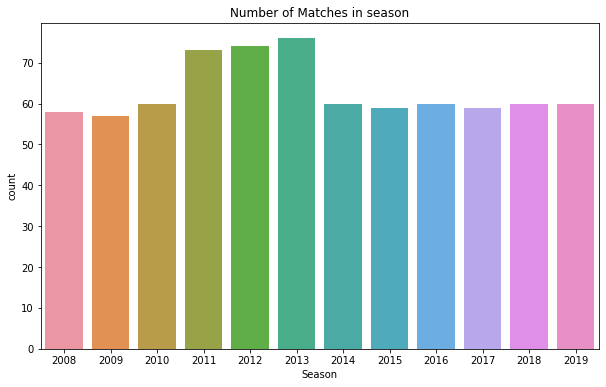

In [8]:
plt.subplots(figsize=(10,6))
sns.countplot(matches_data['season'], data=matches_data)
plt.xlabel("Season")
plt.title("Number of Matches in season")
plt.show()

In [9]:
matches_data["winner"].value_counts().to_frame(name="Number of Wins")

,Number of Wins
Mumbai Indians,109
Chennai Super Kings,100
Kolkata Knight Riders,92
Royal Challengers Bangalore,84
Kings XI Punjab,82
Rajasthan Royals,75
Delhi Daredevils,67
Sunrisers Hyderabad,58
Deccan Chargers,29
Gujarat Lions,13


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


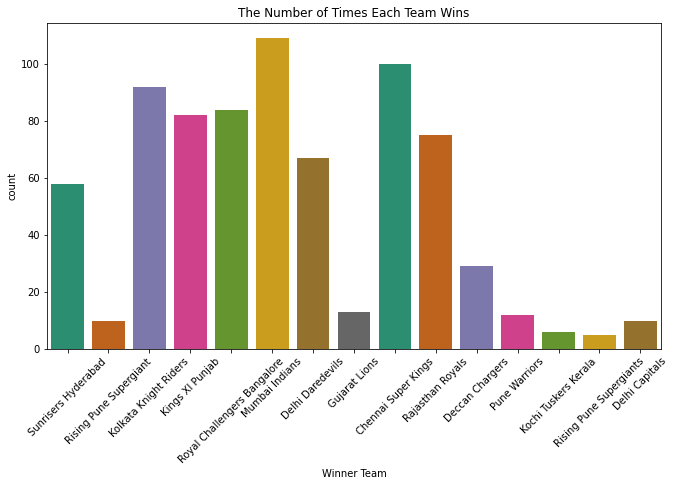

In [10]:
plt.subplots(figsize=(11,6))
sns.countplot(matches_data['winner'], data=matches_data, orient='h', palette="Dark2")
plt.xticks(rotation=45)
plt.xlabel("Winner Team")
plt.title('The Number of Times Each Team Wins')
plt.show()

In [11]:
winner_team = pd.concat([matches_data["team1"],matches_data["team2"], matches_data["winner"]],axis=1, names=["Team1","Team2","WinnerTeam"])
winner_team.head(12)

,team1,team2,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad
6,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians
7,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab
8,Delhi Daredevils,Rising Pune Supergiant,Delhi Daredevils
9,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The Most Team Win the Toss')

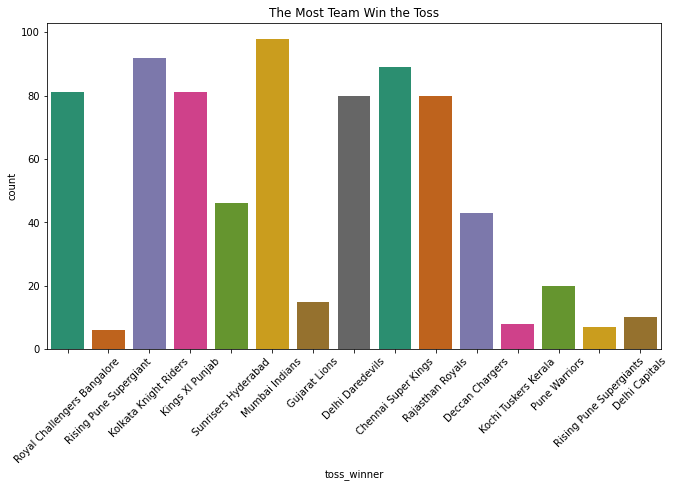

In [12]:
plt.subplots(figsize=(11,6))
sns.countplot(matches_data["toss_winner"], data=matches_data, palette="Dark2")
plt.xticks(rotation=45)
plt.title("The Most Team Win the Toss")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

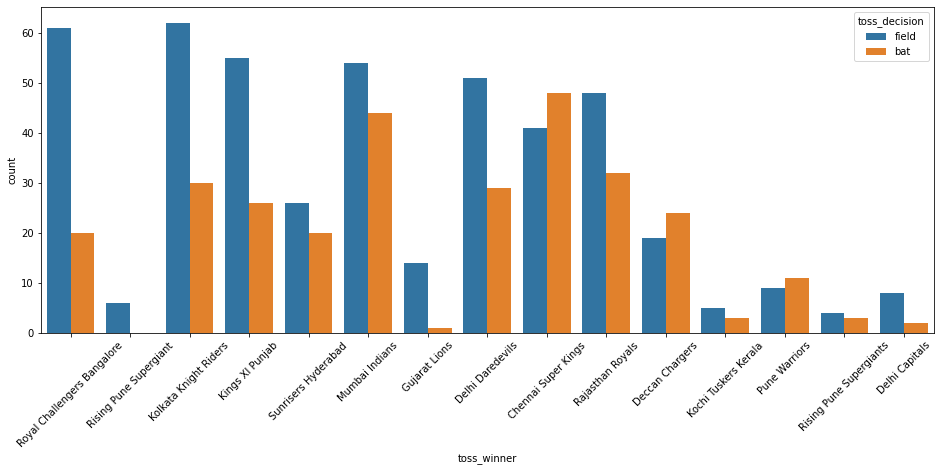

In [13]:
plt.subplots(figsize=(16,6))
sns.countplot(matches_data["toss_winner"], hue=matches_data["toss_decision"])
plt.xticks(rotation=45)

Text(0.5, 1.0, 'The Percentage of Toss Decision')

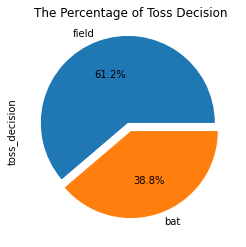

In [14]:
matches_data_copy = matches_data.copy()
matches_data_copy["toss_decision"] = matches_data["toss_decision"].replace({1:"field",0:"bat"})
matches_data_copy["toss_decision"].value_counts().plot(kind="pie", explode=[0.1,0], autopct="%1.1f%%")
plt.title("The Percentage of Toss Decision")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The most cities that host matches')

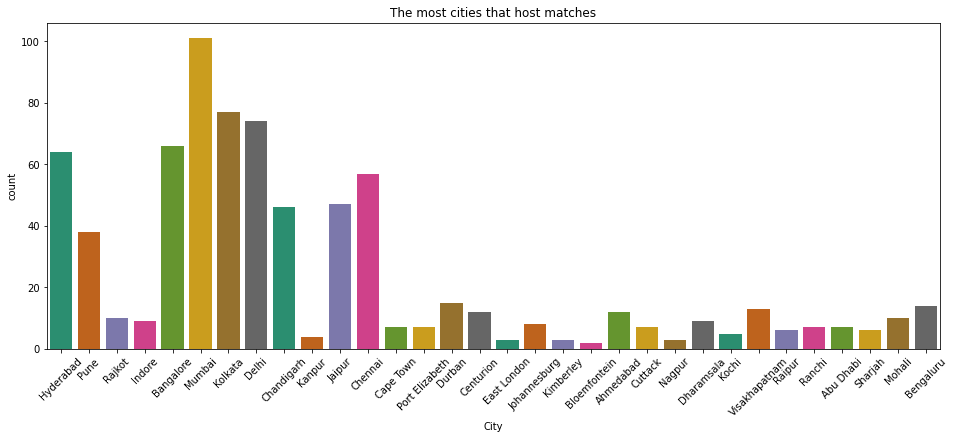

In [15]:
plt.subplots(figsize=(16,6))
sns.countplot(matches_data["city"], data=matches_data, palette="Dark2")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.title("The most cities that host matches")

In [16]:
print("The Most club that win by runs is: ", matches_data.iloc[matches_data["win_by_runs"].idxmax()]['winner'])
print("The Most club that win by wickets is: ", matches_data.iloc[matches_data["win_by_wickets"].idxmax()]['winner'])

The Most club that win by runs is:  Mumbai Indians
The Most club that win by wickets is:  Kolkata Knight Riders


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The most 10 player achieved player of the match')

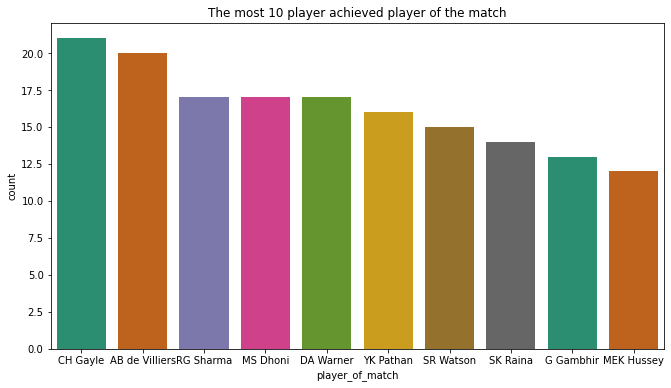

In [17]:
plt.subplots(figsize=(11,6))
sns.countplot('player_of_match',data=matches_data,order=matches_data["player_of_match"].value_counts().index[:10], palette="Dark2")
plt.title("The most 10 player achieved player of the match")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The most 15 venue that host matches')

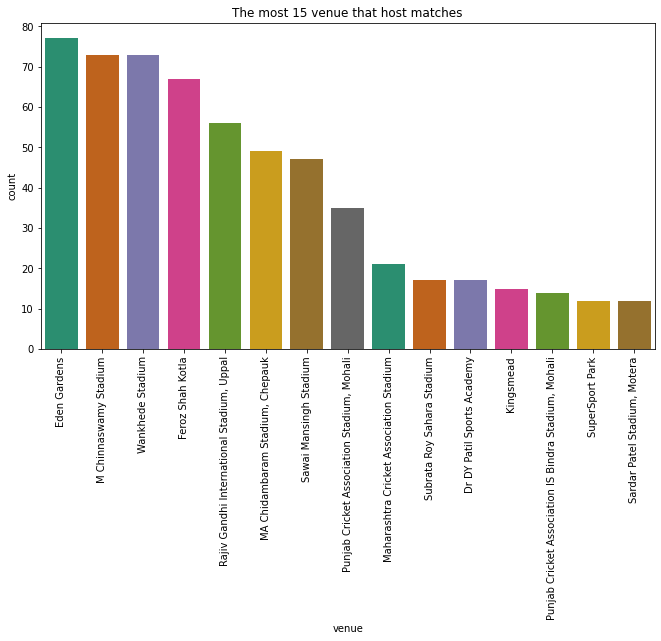

In [18]:
plt.subplots(figsize=(11,6))
sns.countplot("venue", data=matches_data, order=matches_data["venue"].value_counts().index[:15], palette="Dark2")
plt.xticks(rotation=90)
plt.title("The most 15 venue that host matches")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Umpire')

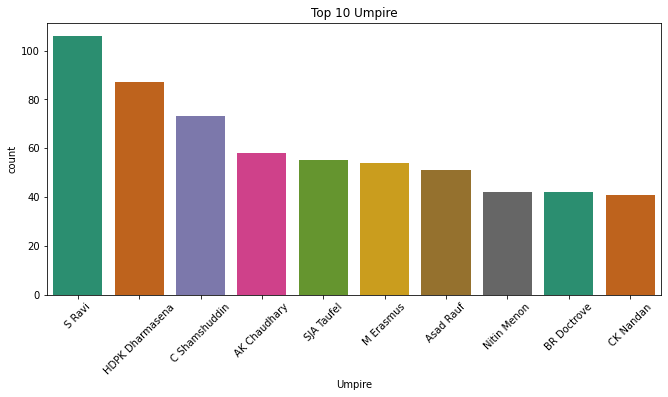

In [19]:
umpire_df = pd.melt(matches_data, id_vars=['id'], value_vars=['umpire1', 'umpire2'])
umpire_df["value"].value_counts()
plt.subplots(figsize=(11,5))
sns.countplot("value", data=umpire_df, order=umpire_df["value"].value_counts().index[:10], palette="Dark2")
plt.xticks(rotation=45)
plt.title("Top 10 Umpire")
plt.xlabel("Umpire")

In [20]:
score_season_for_teams =matches_data.drop_duplicates(subset=['season'])[['season', 'winner']].reset_index(drop=True).sort_values(by="season")
score_season_for_teams

,season,winner
1,2008,Kolkata Knight Riders
2,2009,Mumbai Indians
3,2010,Kolkata Knight Riders
4,2011,Chennai Super Kings
5,2012,Mumbai Indians
6,2013,Kolkata Knight Riders
7,2014,Kolkata Knight Riders
8,2015,Kolkata Knight Riders
9,2016,Rising Pune Supergiants
0,2017,Sunrisers Hyderabad


In [21]:
deliveries_data.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [22]:
deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [23]:
#statical description
deliveries_data.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [24]:
deliveries_data["batting_team"].value_counts()

Mumbai Indians                 22619
Kings XI Punjab                20931
Royal Challengers Bangalore    20908
Kolkata Knight Riders          20858
Chennai Super Kings            19762
Delhi Daredevils               18786
Rajasthan Royals               17292
Sunrisers Hyderabad            12908
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Delhi Capitals                  1909
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64

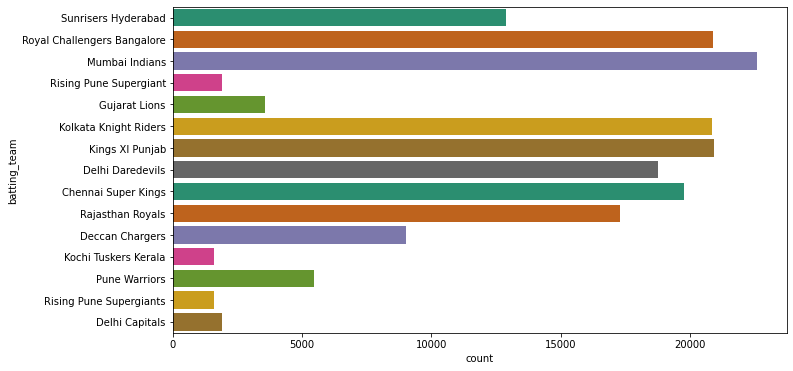

In [25]:
plt.subplots(figsize=(11,6))
sns.countplot(y="batting_team", data=deliveries_data, palette="Dark2")

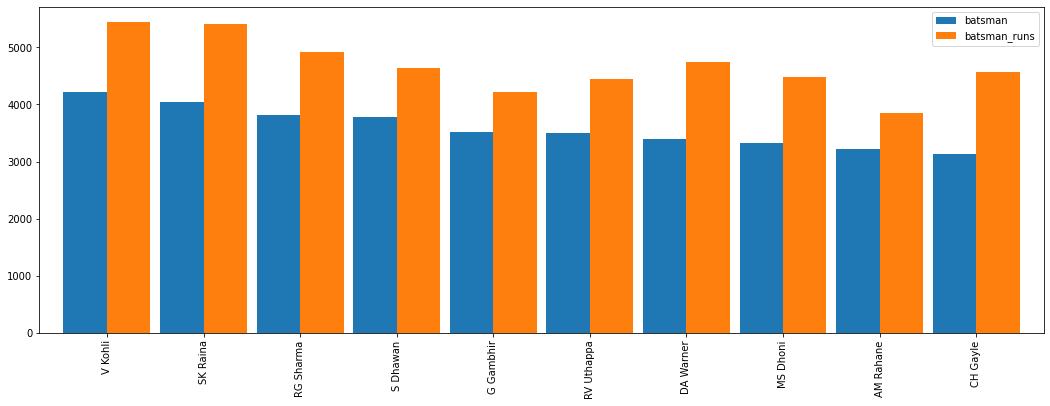

In [26]:
bats_man=deliveries_data['batsman'].value_counts()[:10].to_frame()
country_kill = deliveries_data.groupby('batsman')["batsman_runs"].sum().to_frame()
bats_man.merge(country_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.legend(["batsman","batsman_runs"])
plt.show()